# 数据预处理 - 规范化

### 为什么要规范化？

假设三个人在不同平台看了两部电影并进行了评分，A平台采用5分制，B平台采用百分制；具体评分如下

In [ ]:
zs = [5, 100]
ls = [4.8, 80]
ww = [1, 100]

data = [zs, ls, ww]

根据评分数据可以发现张三和李四品味比较相似

Text(1, 100, 'ww')

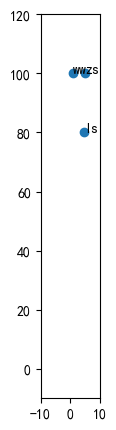

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [i[0] for i in data]
y = [i[1] for i in data]

fig = plt.figure()
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.set_aspect("equal")
ax.set_xlim(-10,10)
ax.set_ylim(-10,120)
ax.scatter(x=x, y=y)
ax.text(5, 100, "zs")
ax.text(4.8, 80, "ls")
ax.text(1,100, "ww")

但是通过散点图可以发现，受第二部电影评分标准权重较大的影响，张三和王五距离较近，

### 电影评分最大最小规范化

[[1.   1.  ]
 [0.95 0.  ]
 [0.   1.  ]]


Text(0.0, 1.0, 'ww')

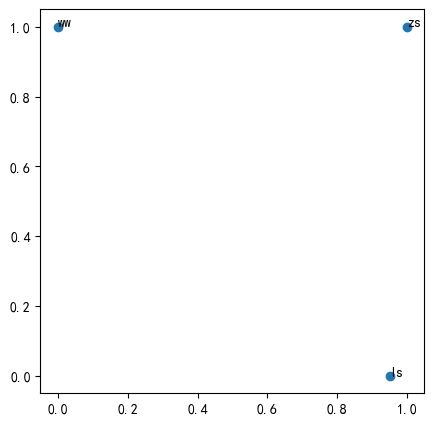

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

zs = [5, 100]
ls = [4.8, 80]
ww = [1, 100]

data = [zs, ls, ww]

scale_data = scaler.fit_transform(data)
print(scale_data)

import matplotlib.pyplot as plt

x = scale_data[:,0]
y = scale_data[:,1]

fig = plt.figure()
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.set_aspect("equal")

ax.scatter(x=x, y=y)
ax.text(scale_data[0][0], scale_data[0][1], "zs")
ax.text(scale_data[1][0], scale_data[1][1], "ls")
ax.text(scale_data[2][0], scale_data[2][1], "ww")

但是，现在发现，规范化后的数据距离较为均匀，无法根据距离判断品味相似的用户；  
仔细观察发现：  
第一个特征的最小值是0， 王五对A的评分1被规范化为0;   
第二个特征的最小值是0,  李四对B的评分80被规范化为0;  
是较为不合理的。

##### 再次规范化

Text(0.2, 1.0, 'ww')

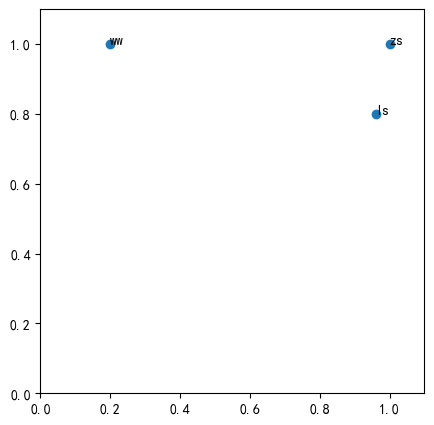

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

zs = [5, 100]
ls = [4.8, 80]
ww = [1, 100]
min = [0, 0]
max = [5, 100]

data = [zs, ls, ww, min, max]

scale_data = scaler.fit_transform(data)


import matplotlib.pyplot as plt

x = scale_data[:3][:,0]
y = scale_data[:3][:,1]

fig = plt.figure()
ax = fig.add_axes((0.1,0.1,0.8,0.8))

ax.set_aspect("equal")
ax.set_xlim(0,1.1)
ax.set_ylim(0,1.1)
ax.scatter(x=x, y=y)
ax.text(scale_data[0][0], scale_data[0][1], "zs")
ax.text(scale_data[1][0], scale_data[1][1], "ls")
ax.text(scale_data[2][0], scale_data[2][1], "ww")

## z-score标准化

z-score : (value - avg(values))/标准差

In [5]:
value_list = [0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 80]

In [6]:
def Z_Score(data):
    lenth = len(data)
    total = sum(data)
    ave = float(total) / lenth
    tempsum = sum([pow(data[i] - ave, 2) for i in range(lenth)])
    tempsum = pow(float(tempsum) / lenth, 0.5)
    for i in range(lenth):
        data[i] = (data[i] - ave) / tempsum
    return data
Z_Score(value_list)

[-0.3860979108204779,
 -0.3860979108204779,
 -0.38229866938559,
 -0.3784994279507022,
 -0.3747001865158143,
 -0.37090094508092647,
 -0.36710170364603867,
 2.6456967542200274]

In [9]:
from sklearn.preprocessing import scale
scale(value_list)

array([-0.38609791, -0.38609791, -0.38229867, -0.37849943, -0.37470019,
       -0.37090095, -0.3671017 ,  2.64569675])

## 小数定标规范化

In [13]:
income = [5000, 58000, 16000]

def Decimal_Normalize(data):
    max_value = abs(max(data))
    decimal_list = data / 10**np.ceil(np.log10(max_value))
    return decimal_list

decimal_result = Decimal_Normalize(value_list)
print('小数定标规范化：', decimal_result)

小数定标规范化： [-0.03860979 -0.03860979 -0.03822987 -0.03784994 -0.03747002 -0.03709009
 -0.03671017  0.26456968]


In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scale()函数和StandardScaler()函数都可以把数据标准化，处理的过程都是 (X-mean) / std。

但是又有点不同，scale()不能迁移到新的数据集，如果是处理训练集和测试集，只能是把训练集和测试集合起来， 计算出共同的mean和std， 然后 (X-mean) / std，再分成训练集和测试集。这里的mean和std的计算涉及到了测试集，是训练集和测试集共同的期望和方差

而StandardScaler()可以迁移到新的数据集，只需要处理训练集，拿训练集的数据计算出均值x_train_mean, x_train_std和方差，然后训练集的X_train和测试集的X_test都执行标准化。 这里注意：测试集的标准化是利用的训练集的均值和方差。 也就是假设训练集的期望和测试集的期望是一样的，这样只需要计算出训练集的期望之后，直接用于测试集就可以了，这里只是训练集的期望和方差，没有涉及测试集

> 原文链接：https://blog.csdn.net/wuzhongqiang/article/details/104211823